In [37]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn import preprocessing
import pandas_profiling
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [38]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [39]:
df.tail()

,x1,x2,x3
9995,0.145917,2.170375,-1.550878
9996,0.978204,7.346647,-2.235902
9997,-2.028288,12.225301,-5.419191
9998,-0.125392,7.648357,-11.417673
9999,-2.875740,4.701211,-3.288438


In [40]:
scaler=preprocessing.StandardScaler()
scaled_df=scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [41]:
scaled_df=pd.DataFrame(scaled_df,columns=['x1','x2','x3'])
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


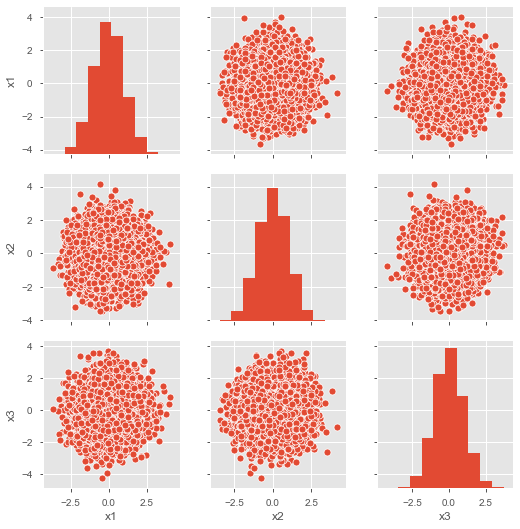

In [42]:
sns.pairplot(scaled_df,diag_kind='hist')

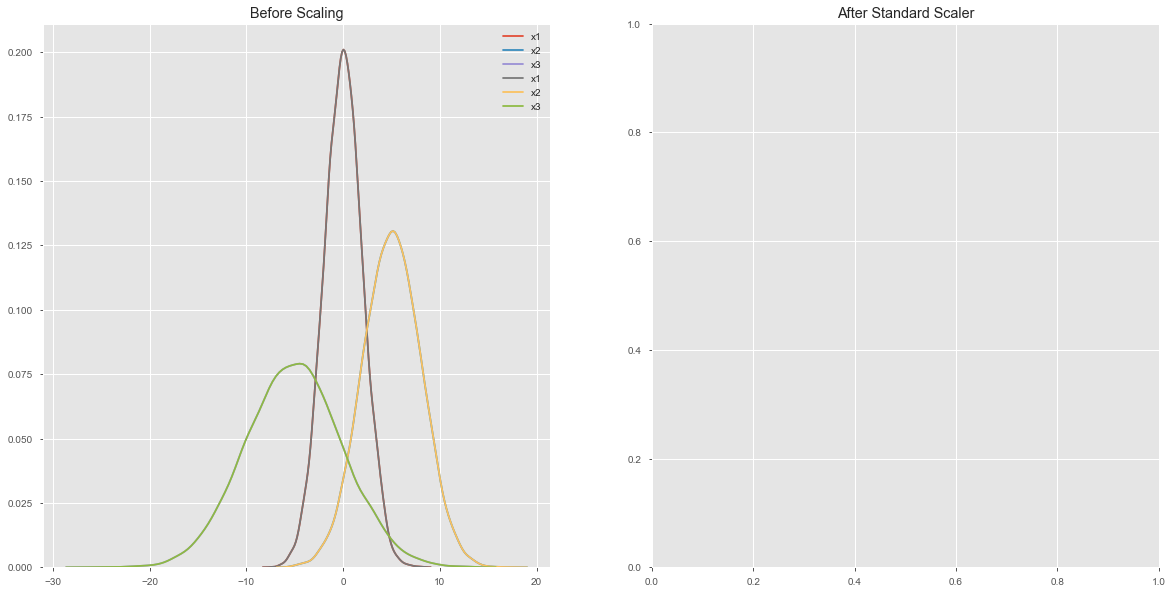

In [43]:
fig, (ax1 ,ax2)=plt.subplots(ncols=2, figsize=(20,10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'],ax=ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(df['x1'],ax=ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)
plt.show()

In [44]:
df=pd.DataFrame({
    'x1':np.random.chisquare(8,1000),
    'x2':np.random.beta(8,2,1000)*40,
    'x3':np.random.normal(50,3,1000)
})
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


In [45]:
df.tail()

,x1,x2,x3
995,5.970794,34.391166,53.369197
996,8.611427,35.227850,49.953444
997,13.534576,34.324809,58.301257
998,8.513871,36.818726,49.019199
999,5.823893,39.207967,47.490093


In [48]:
scaler=preprocessing.MaxAbsScaler()
MinMax_scaled_df=scaler.fit_transform(df)
MinMax_scaled_df

array([[0.34866707, 0.83615595, 0.91682609],
       [0.21839196, 0.97944781, 0.88257534],
       [0.77112533, 0.66266748, 0.8208503 ],
       ...,
       [0.52943468, 0.8623379 , 0.98059552],
       [0.33303877, 0.92499227, 0.82447634],
       [0.22781439, 0.98501688, 0.79875761]])

In [49]:
scaled_df=pd.DataFrame(scaled_df,columns=['x1','x2','x3'])
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


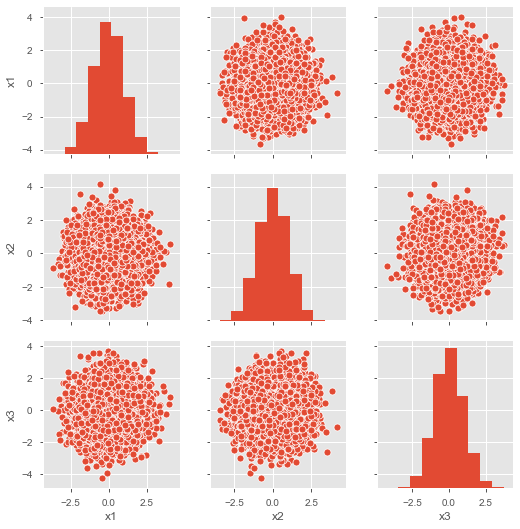

In [50]:
sns.pairplot(scaled_df,diag_kind='hist')

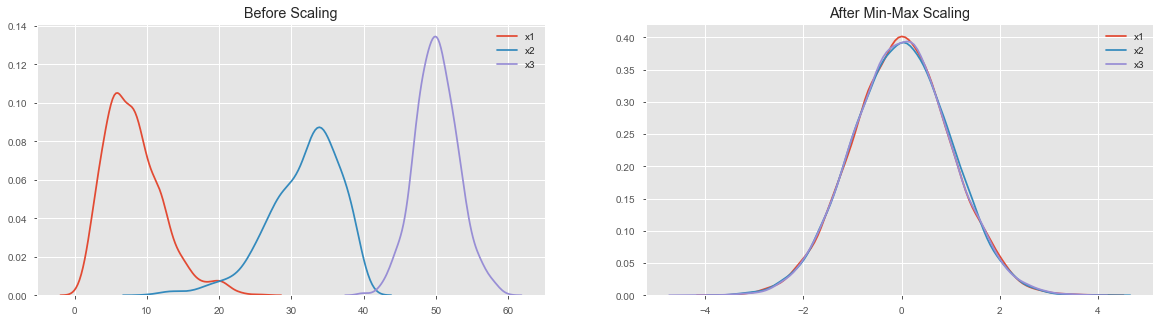

In [54]:
fig, (ax1 ,ax2)=plt.subplots(ncols=2, figsize=(20,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'],ax=ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'],ax=ax2)
sns.kdeplot(scaled_df['x2'],ax=ax2)
sns.kdeplot(scaled_df['x3'],ax=ax2)
plt.show()

In [52]:
x=pd.DataFrame({
    #Distribution with lower outliers
    'x1':np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,25)]),
     #Distribution with higher outliers
    'x2':np.concatenate([np.random.normal(30,1,1000),np.random.normal(50,1,25)]),
})
x.head()

,x1,x2
0,21.289328,30.339567
1,20.475220,28.989049
2,20.472324,29.108980
3,17.862670,30.381639
4,20.554138,28.639373


In [27]:
scaler=preprocessing.RobustScaler()
robust_scaled_df=scaler.fit_transform(x)
robust_scaled_df=pd.DataFrame(robust_scaled_df,columns=['x1','x2'])

In [28]:
robust_scaled_df.head()

,x1,x2
0,-0.547794,0.076264
1,-1.159895,-0.124649
2,2.159783,-0.185244
3,0.176011,-0.075727
4,1.624558,-0.825587


In [30]:
scaler=preprocessing.MinMaxScaler()
minmax_scaled_df=scaler.fit_transform(x)
minmax_scaled_df=pd.DataFrame(robust_scaled_df,columns=['x1','x2'])

In [31]:
minmax_scaled_df.head()

,x1,x2
0,-0.547794,0.076264
1,-1.159895,-0.124649
2,2.159783,-0.185244
3,0.176011,-0.075727
4,1.624558,-0.825587


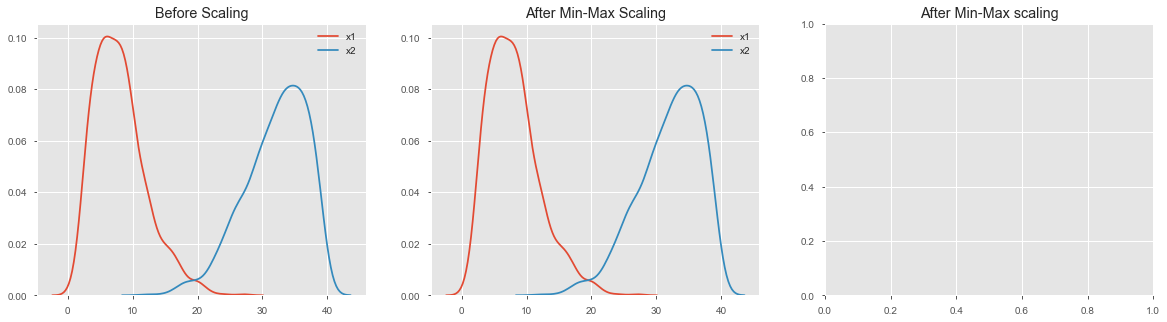

In [32]:
fig, (ax1 ,ax2,ax3)=plt.subplots(ncols=3, figsize=(20,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'],ax=ax1)
sns.kdeplot(df['x2'],ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df['x1'],ax=ax2)
sns.kdeplot(df['x2'],ax=ax2)

ax3.set_title('After Min-Max scaling')
plt.show()

In [57]:
from mpl_toolkits.mplot3d import Axes3D

df=pd.DataFrame({
    'x1':np.random.randint(-100,100,1000).astype(float),
    'y1':np.random.randint(-80,80,1000).astype(float),
    'z1':np.random.randint(-150,150,1000).astype(float)
})
df.head()

,x1,y1,z1
0,-7.0,-68.0,67.0
1,64.0,-5.0,-82.0
2,-99.0,62.0,8.0
3,58.0,32.0,-26.0
4,50.0,9.0,123.0


In [58]:
df.tail()

,x1,y1,z1
995,59.0,-69.0,15.0
996,-99.0,0.0,21.0
997,88.0,20.0,103.0
998,-58.0,-68.0,-40.0
999,-94.0,-22.0,107.0


In [59]:
scaler=preprocessing.Normalizer()
scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

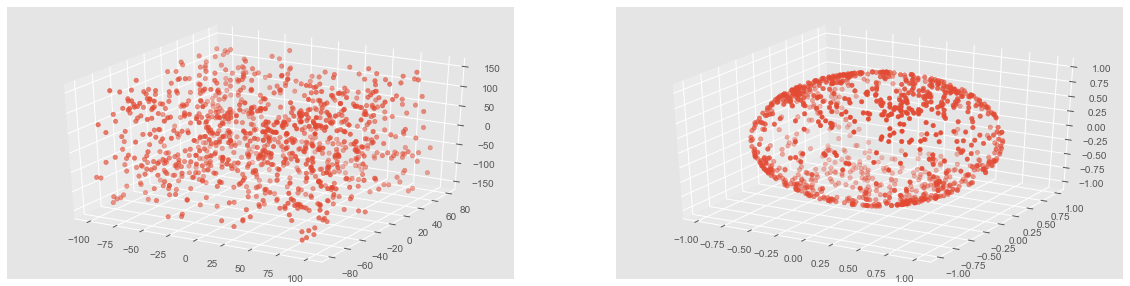

In [60]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
ax1.scatter(df['x1'],df['y1'],df['z1'])
ax2.scatter(scaled_df['x1'],scaled_df['y1'],scaled_df['z1'])
plt.show()